# <h1 align="center"> ADY201 final project <h1/>

## GROUP: 1
### Group member: Đỗ Tùng Dương (Leader) - HE194222
### Group member: Lê Hoàng Tú - HE190018
### Group member: Nguyễn Vũ Anh - HE191200
### Group member: Đỗ Tiến Anh - HE190404

# 1. Select an appropriate dataset

Dataset: Student_performance_data
- File: `Student_performance_data _.csv` (cùng thư mục với notebook này)
- Kích thước: ~2392 hàng, 15 cột
- Đáp ứng yêu cầu:
  - ≥ 500 hàng dữ liệu ✔️
  - ≥ 5 cột đặc trưng ✔️

### Chi tiết file: Student_performance_data

- Kích thước: 2392 hàng × 15 cột (không có giá trị thiếu theo pf.info()).
- Mục tiêu: `GradeClass` (phân lớp đa nhãn 5 lớp: 0=A, 1=B, 2=C, 3=D, 4=F).
- Lưu ý: không sử dụng `GPA` làm feature (leakage). `StudentID` cũng nên loại bỏ.

Các cột (kiểu dữ liệu & chú thích)
- StudentID (int): mã định danh học sinh (1001–3392) — dùng để tham chiếu, không dùng làm feature.
- Age (int): 15–18.
- Gender (int): 0 = Male, 1 = Female.
- Ethnicity (int): 0=Caucasian, 1=African American, 2=Asian, 3=Other.
- ParentalEducation (int): 0=None, 1=High School, 2=Some College, 3=Bachelor's, 4=Higher (có tính thứ tự).
- StudyTimeWeekly (float): giờ học/tuần (khoảng 0–20).
- Absences (int): số ngày vắng (khoảng 0–30).
- Tutoring (int): 0=No, 1=Yes.
- ParentalSupport (int): 0=None, 1=Low, 2=Moderate, 3=High, 4=Very High (có thứ tự).
- Extracurricular (int): 0/1. 0 không tham gia, 1 tham gia.
- Sports (int): 0/1. 0 không tham gia, 1 tham gia.
- Music (int): 0/1. 0 không tham gia, 1 tham gia.
- Volunteering (int): 0/1. 0 không tham gia, 1 tham gia.
- GPA (float): điểm trung bình — KHÔNG đưa vào features (leakage).
- GradeClass (float/int): target (0..4) — hiện có kiểu số thực trong df, nên cast về int khi modeling.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('Student_performance_data _.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


# 2. Mục tiêu mô hình (Modeling objective)

Bài toán: phân loại đa lớp dự đoán điểm chữ cuối kỳ (`GradeClass` ∈ {A, B, C, D, F}).

GradeClass: Classification of students' grades based on GPA:
```
0: 'A' (GPA >= 3.5)

1: 'B' (3.0 <= GPA < 3.5)

2: 'C' (2.5 <= GPA < 3.0)

3: 'D' (2.0 <= GPA < 2.5)

4: 'F' (GPA < 2.0)
```

- Target variable: `GradeClass`
- Feature variables:
  - Numerical features:  `StudyTimeWeekly`, `Absences`
  - Categorical features:  , `Gender`, `Ethnicity`, `ParentalEducation`, `Tutoring`, `ParentalSupport`, `Extracurricular`, `Sports`, `Music`, `Volunteering`
- Các biến đã loại khỏi features: `GPA`, `GradeClass`, `Age`, `StudentID`

# 3. Data Visualization

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

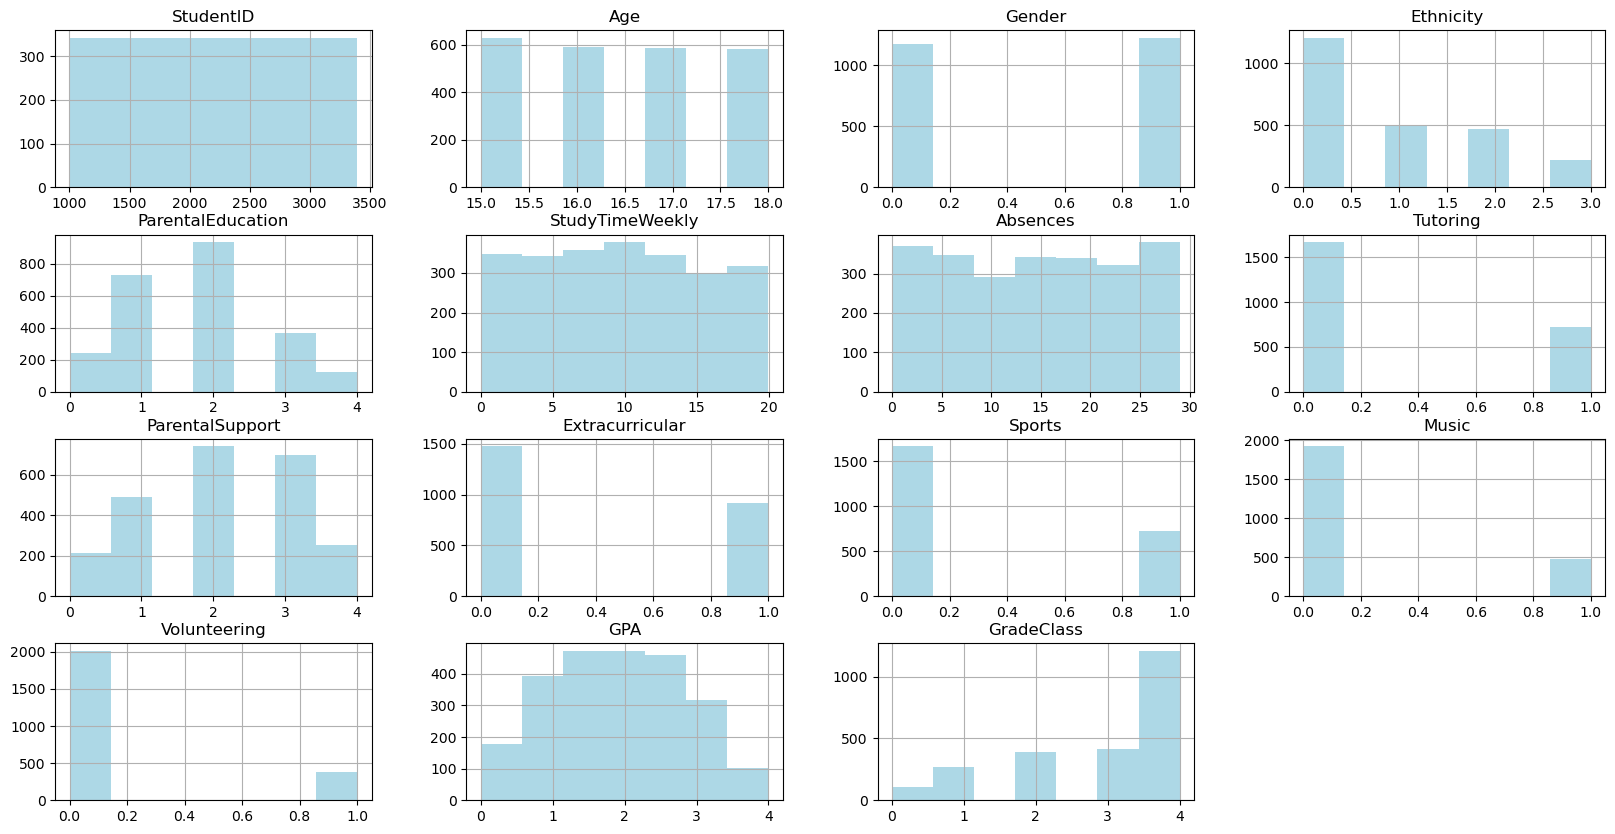

In [7]:
df.hist(figsize=(20, 10), bins=7, color="lightblue")

**Từ biểu đồ histogram ở trên, ta có thể kết luận:**
- StudentID không có phân phối và về mặt logic sẽ không ảnh hưởng đến Grade
- Chỉ có 4 lứa tuổi
- Có 4 loại dân tộc
- Có nhiều học sinh điểm thấp, đa số là điểm F

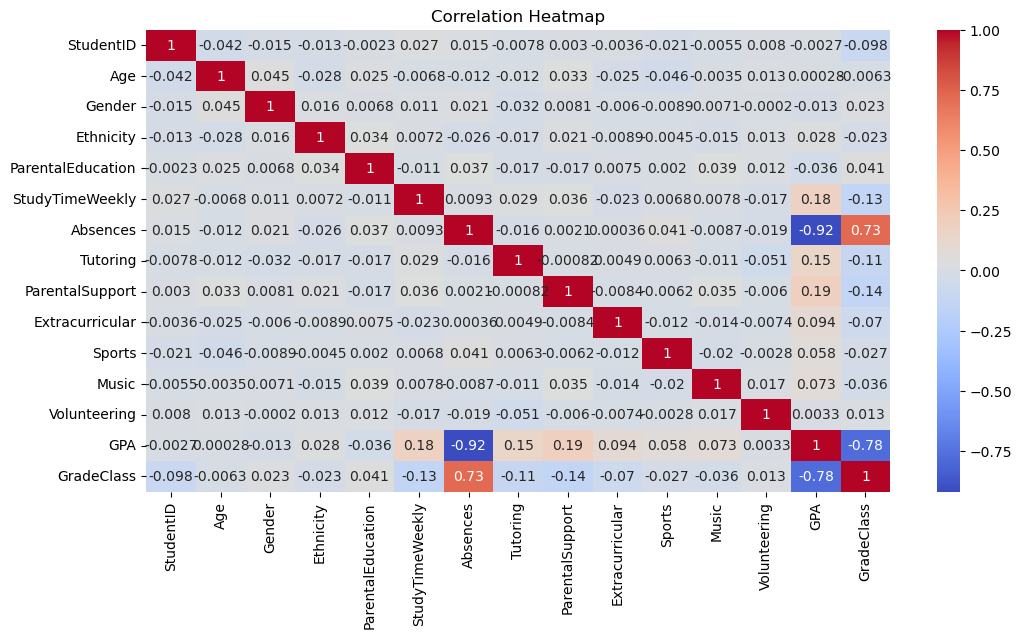

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Tiền xử lý dữ liệu (Preprocessing Data)


In [31]:
print("Kiểm tra dữ liệu có ô nào null không:", pf.isnull().values.any())

Kiểm tra dữ liệu có ô nào null không: False


- Tiến hành đánh giá tầm quan trọng của đặc điểm:
    - Xác định cột nào là số và cột nào là phân loại
    - Mã hóa các cột phân loại để chuyển đổi các biến đối tượng thành số
    - Điều chỉnh tỷ lệ các cột số để đảm bảo rằng các số lớn có tác động tương đương đến mô hình của chúng ta như các số nhỏ

In [32]:
#Xác định cột số và cột phân loại
columns = list(pf.columns)

categoric_columns = []
numeric_columns = []

for col in columns:
    # Nếu cột có hơn 5 giá trị khác nhau => xem là numeric
    if len(pf[col].unique()) > 5:
        numeric_columns.append(col)
    else:
        categoric_columns.append(col)

# Giả sử cột đầu tiên là ID hoặc không phải dạng số => loại bỏ khỏi numeric
if len(numeric_columns) > 0:
    numeric_columns = numeric_columns[1:]

print('\n Numerical features:')
print(numeric_columns)

print('\n Categorical features:')
print(categoric_columns)


 Numerical features:
['StudyTimeWeekly', 'Absences', 'GPA']

 Categorical features:
['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [33]:
# Tạo bản sao để tránh ghi đè dữ liệu gốc
df = pf.copy()

# Encode categorical features bằng LabelEncoder
label_encoder = LabelEncoder()
for column in categoric_columns:
    df[column] = label_encoder.fit_transform(df[column])

#  Scale numeric features bằng StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# --- Kiểm tra kết quả ---
print("\n Dữ liệu sau khi mã hóa và chuẩn hóa:")
print(df.head())


 Dữ liệu sau khi mã hóa và chuẩn hóa:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001    2       1          0                  2         1.780336   
1       1002    3       0          0                  1         0.997376   
2       1003    0       0          2                  3        -0.984045   
3       1004    2       1          0                  3         0.045445   
4       1005    2       1          0                  2        -0.902311   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0 -0.890822         1                2                0       0      1   
1 -1.717694         0                1                0       0      0   
2  1.353542         0                2                0       0      0   
3 -0.063951         0                3                1       0      0   
4  0.290422         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  1.

In [38]:
# Xác định biến mục tiêu (target feature)
X = df.drop(columns=['GradeClass', 'GPA', 'StudentID', 'Age'])
y = df['GradeClass']

# Train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)